In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [6]:
test.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [7]:
def setCategory(c):
    if c['Severity'] == 'Minor_Damage_And_Injuries':
        return 0
    elif c['Severity'] == 'Significant_Damage_And_Fatalities':
        return 1
    elif c['Severity'] == 'Significant_Damage_And_Serious_Injuries':
        return 2
    else:
        return 3
    

In [8]:
train["Severity"] = train.apply(setCategory, axis =1)

In [9]:
x = train.iloc[:,[1,2,3,4,5,6,7,8,10]].values
y= train.iloc[:,0].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [29]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=20)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot')

In [24]:
! dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.959362 to fit


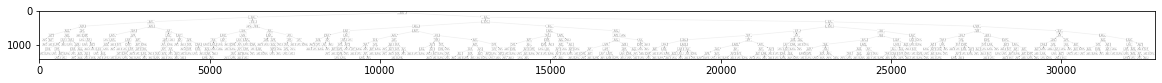

In [25]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [31]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

In [32]:
a

0.9088

In [33]:
test1 = test.iloc[:,[0,1,2,3,4,5,6,7,9]].values
ans = model.predict(test1)

In [ ]:
ans.shape

(2500,)

In [ ]:
def Category(c):
    if c == 0:
        return 'Minor_Damage_And_Injuries'
    elif c == 1:
        return 'Significant_Damage_And_Fatalities'
    elif c == 2:
        return 'Significant_Damage_And_Serious_Injuries'
    else:
        return 'Highly_Fatal_And_Damaging'

In [ ]:
y_ans = map(Category,ans)

In [ ]:
ans_list =list(y_ans) 

In [ ]:
submission = pd.DataFrame({
        "Accident_ID": test["Accident_ID"],
        "Severity": ans_list
    })

submission.to_csv('submission4.csv', index=False)

In [ ]:
submission = pd.read_csv('submission4.csv')